In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('../src/static/IEA-EV-dataEV-salesHistoricalCars.csv')
df['year'] = pd.to_datetime(df['year'], format='%Y')
df = df.dropna()
df = df[df["parameter"] == "Oil displacement, million lge"][['year','value']]
df = df.groupby(['year']).mean().reset_index()

In [13]:
X = df.index.values.reshape(-1, 1)
y = df['value'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [15]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [16]:
train_mse = mean_squared_error(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f"Training Mean Squared Error (MSE): {train_mse}")
print(f"Training Mean Absolute Error (MAE): {train_mae}")
print(f"Test Mean Squared Error (MSE): {test_mse}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")

Training Mean Squared Error (MSE): 0.0006625195698275958
Training Mean Absolute Error (MAE): 0.021585547178192176
Test Mean Squared Error (MSE): 53493298.54113627
Test Mean Absolute Error (MAE): 6220.41049003947


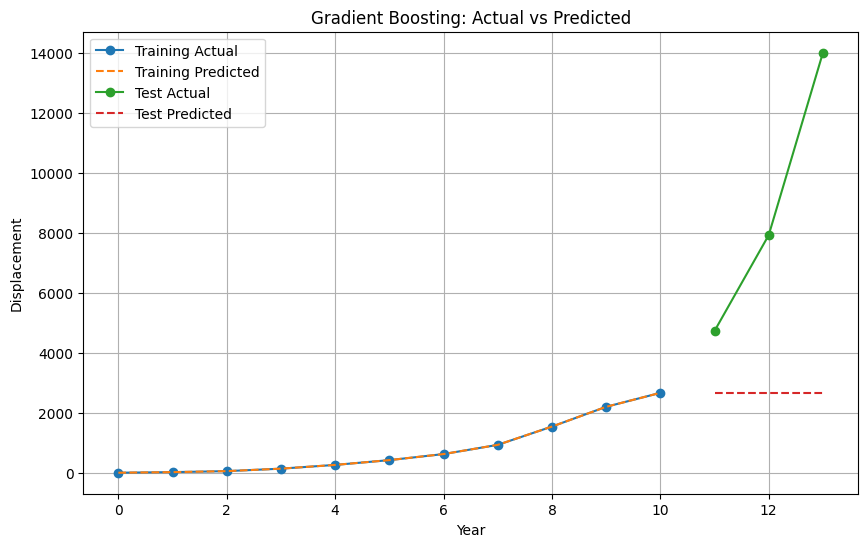

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, marker='o', label='Training Actual')
plt.plot(X_train, train_predictions, linestyle='--', label='Training Predicted')
plt.plot(X_test, y_test, marker='o', label='Test Actual')
plt.plot(X_test, test_predictions, linestyle='--', label='Test Predicted')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.xlabel('Year')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

In [23]:
future_years = np.arange(df.index[-1] + 1, df.index[-1] + 6).reshape(-1, 1)
future_predictions = model.predict(future_years)

In [25]:
forecast_df = pd.DataFrame({'year': future_years.flatten(), 'value': future_predictions})
forecast_df.set_index('year', inplace=True)
combined_df = pd.concat([df, forecast_df])

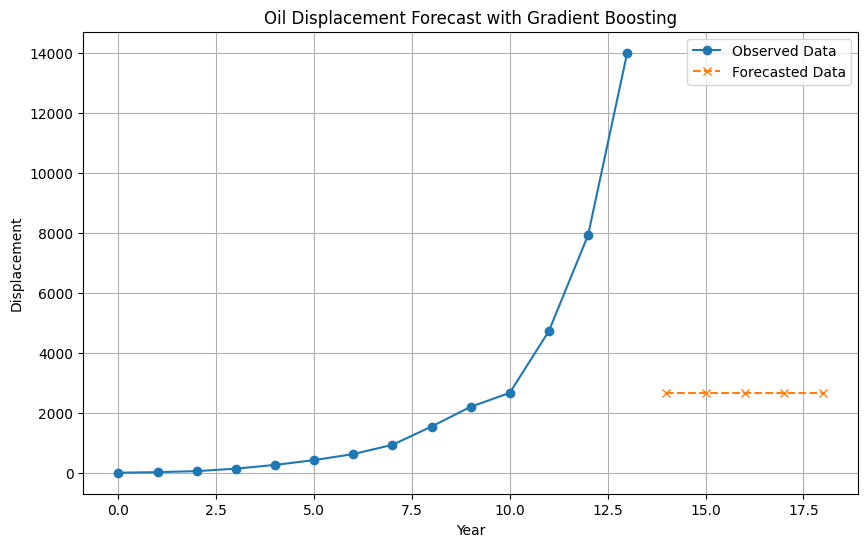

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], marker='o', label='Observed Data')
plt.plot(forecast_df.index, forecast_df['value'], marker='x', linestyle='--', label='Forecasted Data')
plt.title('Oil Displacement Forecast with Gradient Boosting')
plt.xlabel('Year')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()
